In [1]:
import sys
sys.path.append("../..")
import module.components.CONST as CONST
from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
ns = range(1, 16)
sizes = [n**2 for n in ns]
nets = [Network(n, n, 1, []) for n in ns]
for net in nets:
    #net.set_voltage_config([0.1, -0.1], 0)
    pass

In [3]:
mfs = [MeanField(net) for net in nets]
qmf2s = [QuickMeanField2(net) for net in nets]

In [4]:
def measure_MF1(mf):
    mf.numeric_integration_solve(N = 60)

def measure_QMF2(qmf2):
    qmf2.numeric_integration_solve(N = 60)

In [5]:
mf_times = [timeit.timeit(lambda: measure_MF1(mf), number = 10) for mf in mfs]
qmf2_times = [timeit.timeit(lambda: measure_QMF2(qmf2), number = 10) for qmf2 in qmf2s]

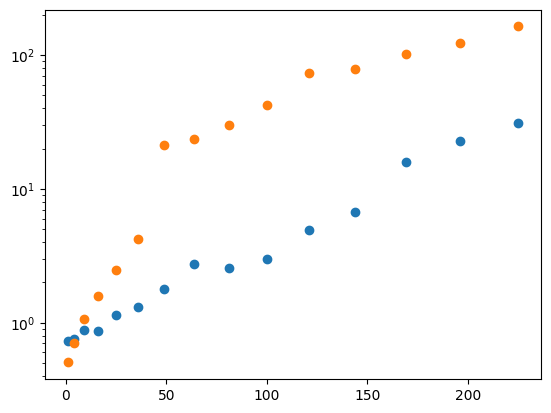

In [11]:
plt.scatter(sizes, mf_times)
plt.scatter(sizes, qmf2_times)

# plt.xscale("log")
plt.yscale("log")